In [27]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare
from statsmodels.distributions.empirical_distribution import ECDF
import random
from IPython.display import display, Latex

In [54]:
theta=1
random_var=np.random.uniform(size=100,low=theta,high=2*theta)

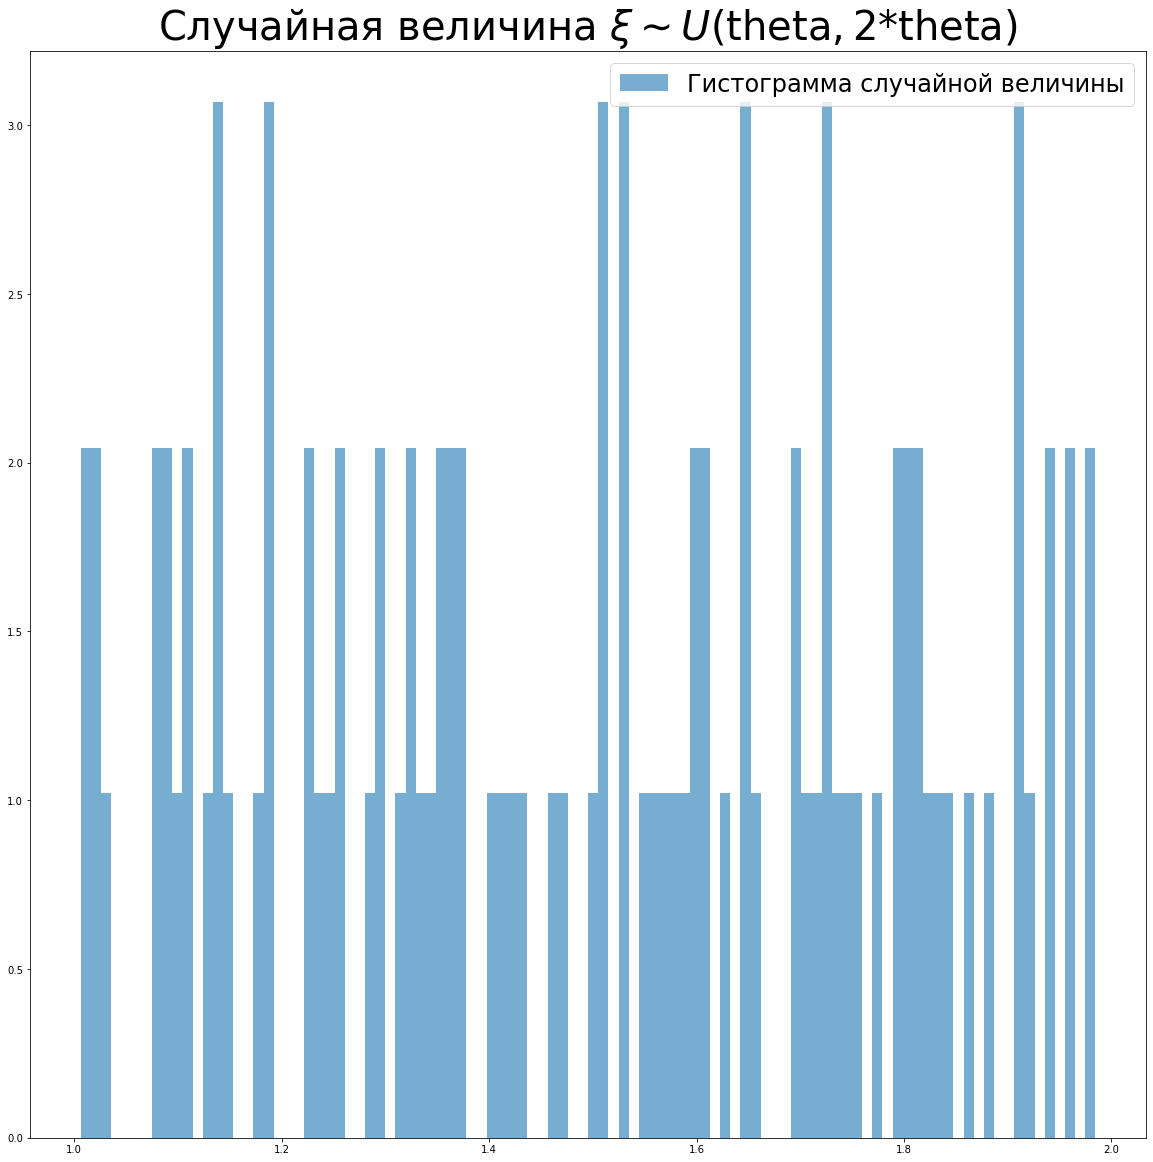

In [55]:
grid = np.linspace(10, 10, 100)  # сетка для построения графика
plt.figure(figsize=(20, 20))
plt.hist(random_var,  bins=100, density=True, alpha=0.6, 
         label='Гистограмма случайной величины')
plt.title(r'Случайная величина $\xi\sim U($theta$, $2*theta$)$', fontsize=40)
plt.legend(fontsize=24, loc=1)

plt.show()

In [56]:
eps=0.025 
n=len(random_var)

# доверительные интервалы

In [57]:
#точный
a1,a2=random_var.max()/(1+(1-eps)**(1/len(random_var))),random_var.max()/(1+(eps)**(1/len(random_var)))
print("точный: (",a1,',',a2,')')

точный: ( 0.9924224090382708 , 1.0105970362656065 )


# омм

In [58]:
b1, b2 = 2/3*random_var.mean() - 1.3*((random_var**2).mean() - random_var.mean()**2)**(0.5)/(n**0.5), 2/3*random_var.mean() + 1.3*((random_var**2).mean() - random_var.mean()**2)**(0.5)/(n**0.5)

In [59]:
print("OMM: (",b1,',',b2,')')

OMM: ( 0.9600253461053663 , 1.0338861737557472 )


ОМП не считалось из-за невыполнения условий теоремы

# bootstrap

In [60]:
def randsampl(sample):
    rand=[]
    for i in range(len(sample)):
        rand.append(random.choice(sample))
    return np.array(rand)

In [61]:
bootdeltas=[]
for i in range(1000):
    sample=randsampl(random_var)
    bootdeltas.append(2/3*sample.mean())
    
bootdeltas.sort()
print('(',bootdeltas[24],' ',bootdeltas[974],')')


( 0.9592299475646464   1.0358468536815932 )


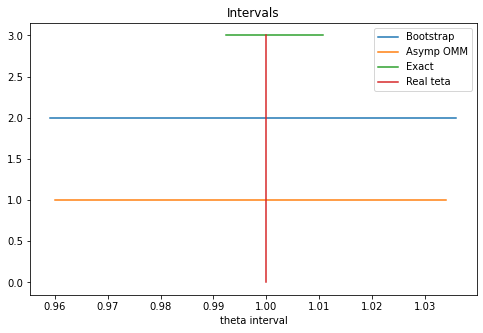

In [63]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([bootdeltas[24], bootdeltas[974]], [2, 2], label = 'Bootstrap')
ax.plot([b1, b2], [1, 1], label = 'Asymp OMM')
ax.plot([a1, a2], [3, 3], label = 'Exact')
ax.plot([theta, theta], [0,3], label = 'Real teta')

ax.set_title('Intervals')    

ax.set_xlabel('theta interval')

ax.legend(loc = 'best')